# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create endpoint URL with each city
city_url = url + "&q=" + city 
    
requests.get(city_url).json()

{'coord': {'lon': 19.2345, 'lat': -34.4187},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 65.8,
  'feels_like': 66.45,
  'temp_min': 65.8,
  'temp_max': 65.8,
  'pressure': 1011,
  'humidity': 93,
  'sea_level': 1011,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 8.97, 'deg': 342, 'gust': 12.15},
 'rain': {'1h': 0.33},
 'clouds': {'all': 100},
 'dt': 1682294887,
 'sys': {'type': 2,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1682313156,
  'sunset': 1682352577},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | reggane
Processing Record 6 of Set 1 | ulsteinvik
Processing Record 7 of Set 1 | sisimiut
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | talcahuano
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | gryazi
Processing Record 13 of Set 1 | mariehamn
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | pitkyaranta
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | queenstown
Processing Record 18 of Set 1 | uliastay
Processing Record 19 of Set 1 | lionel town
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 | tosontsen

Processing Record 39 of Set 4 | chegdomyn
Processing Record 40 of Set 4 | hailar
Processing Record 41 of Set 4 | dudinka
Processing Record 42 of Set 4 | kimberley
Processing Record 43 of Set 4 | callao
Processing Record 44 of Set 4 | nonantola
Processing Record 45 of Set 4 | mokhsogollokh
Processing Record 46 of Set 4 | an nuhud
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | swift current
Processing Record 1 of Set 5 | filadelfia
Processing Record 2 of Set 5 | buedu
Processing Record 3 of Set 5 | itaituba
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | udachny
Processing Record 6 of Set 5 | kultali
City not found. Skipping...
Processing Record 7 of Set 5 | sompeta
Processing Record 8 of Set 5 | ginir
Processing Record 9 of Set 5 | cascais
Processing Record 10 of Set 5 | rockingham
Processing Record 11 of Set 5 | port macquarie
Processing Record 12 of Set 

Processing Record 31 of Set 8 | pangai
Processing Record 32 of Set 8 | palmer
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | segezha
Processing Record 36 of Set 8 | eyl
Processing Record 37 of Set 8 | bam
Processing Record 38 of Set 8 | hailey
Processing Record 39 of Set 8 | kalispell
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | kapa'a
Processing Record 42 of Set 8 | heishan
Processing Record 43 of Set 8 | arklow
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | ca mau
Processing Record 46 of Set 8 | mahdia
Processing Record 47 of Set 8 | yinchuan
Processing Record 48 of Set 8 | humberto de campos
Processing Record 49 of Set 8 | chokwe
Processing Record 0 of Set 9 | zaragoza
Processing Record 1 of Set 9 | sao cristovao
Processing Record 2 of Set 9 | charters towers
Processing Record 3 of Set 9 | taoudenni
Processing Record 4 of Set 9 | mujiayingzi
Processing Record 5 of 

Processing Record 21 of Set 12 | vanimo
Processing Record 22 of Set 12 | choyr
Processing Record 23 of Set 12 | lisala
Processing Record 24 of Set 12 | lhokseumawe
Processing Record 25 of Set 12 | anaco
Processing Record 26 of Set 12 | kulia village
City not found. Skipping...
Processing Record 27 of Set 12 | toliara
Processing Record 28 of Set 12 | roma
Processing Record 29 of Set 12 | iskateley
Processing Record 30 of Set 12 | kirillov
Processing Record 31 of Set 12 | lubang
Processing Record 32 of Set 12 | borgarnes
Processing Record 33 of Set 12 | maintirano
Processing Record 34 of Set 12 | goba
Processing Record 35 of Set 12 | banda aceh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [14]:
# Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,37.22,95,100,12.95,GS,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.58,63,68,32.59,TF,2023-04-24
2,uturoa,-16.7333,-151.4333,82.11,78,96,11.10,PF,2023-04-24
3,mount isa,-20.7333,139.5000,82.17,39,100,11.50,AU,2023-04-24
4,reggane,26.7158,0.1714,81.36,18,46,13.44,DZ,2023-04-24


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../resources/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.22,95,100,12.95,GS,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.58,63,68,32.59,TF,2023-04-24
2,uturoa,-16.7333,-151.4333,82.11,78,96,11.10,PF,2023-04-24
3,mount isa,-20.7333,139.5000,82.17,39,100,11.50,AU,2023-04-24
4,reggane,26.7158,0.1714,81.36,18,46,13.44,DZ,2023-04-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

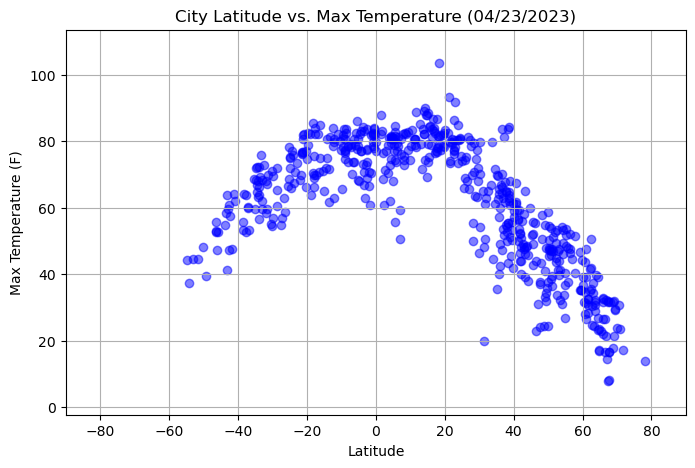

In [18]:
# Build scatter plot for latitude vs. temperature
# Set the plot size
plt.figure(figsize=(8,5))

# Build the scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.5)

# Set the x and y axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set the title of the plot
plt.title('City Latitude vs. Max Temperature (04/23/2023)')

# Set the grid and limits for the x and y axis
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

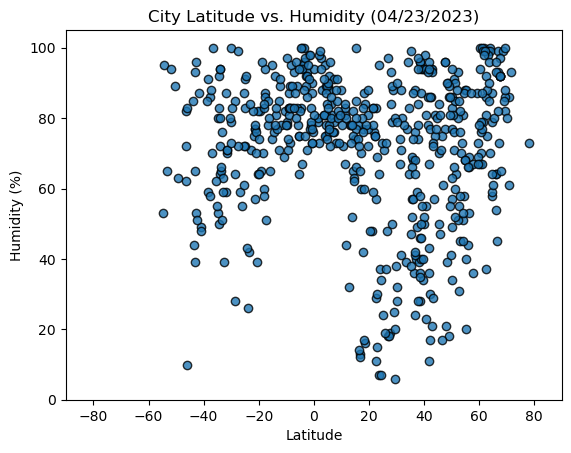

In [19]:
# Build the scatter plots for latitude vs. humidity
# Create scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Set the title and axis labels
plt.title("City Latitude vs. Humidity (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the x and y axis limits
plt.xlim(-90, 90)
plt.ylim(0, 105)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

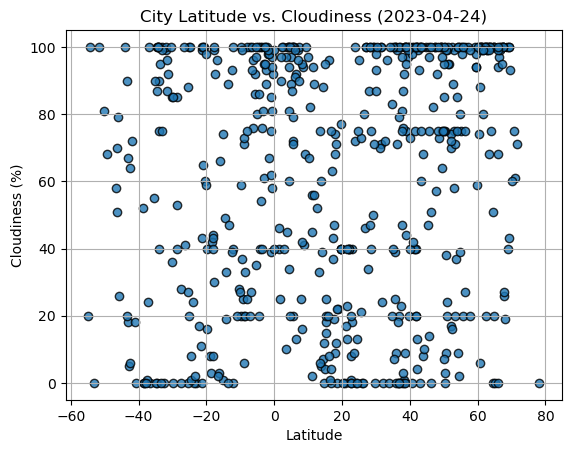

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, edgecolors='black')

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({city_data_df['Date'].iloc[0]})")

# Add grid to the plot
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

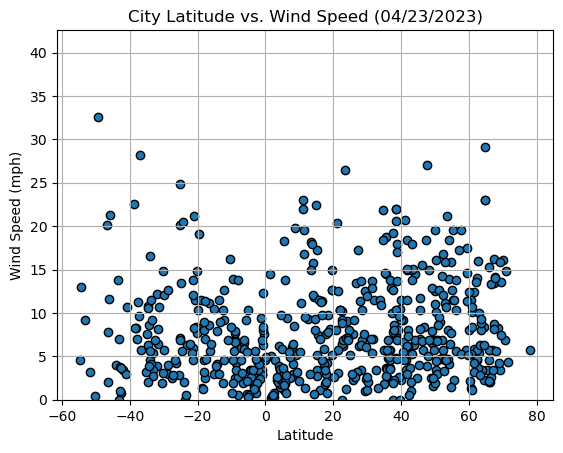

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set the chart title, x-axis label, and y-axis label
plt.title("City Latitude vs. Wind Speed " + time.strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y-axis limit
plt.ylim(0, max(city_data_df["Wind Speed"])+10)

# Add a grid to the chart
plt.grid()

# Incorporate the other graph properties
# Save the figure
plt.savefig("../resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line y values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the line equation and r-value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r^2 = {round(rvalue**2,2)}", (text_coordinates[0],text_coordinates[1]-20), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print the correlation coefficient
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,reggane,26.7158,0.1714,81.36,18,46,13.44,DZ,2023-04-24
5,ulsteinvik,62.3432,5.8487,41.76,86,100,14.00,NO,2023-04-24
6,sisimiut,66.9395,-53.6735,32.32,99,100,5.73,GL,2023-04-24
10,anadyr,64.7500,177.4833,23.50,79,20,29.08,RU,2023-04-24
11,gryazi,52.4966,39.9359,53.22,55,100,4.92,RU,2023-04-24


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_cities_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display the Southern Hemisphere DataFrame
southern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.22,95,100,12.95,GS,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.58,63,68,32.59,TF,2023-04-24
2,uturoa,-16.7333,-151.4333,82.11,78,96,11.10,PF,2023-04-24
3,mount isa,-20.7333,139.5000,82.17,39,100,11.50,AU,2023-04-24
7,edinburgh of the seven seas,-37.0676,-12.3116,60.30,70,100,28.23,SH,2023-04-24


###  Temperature vs. Latitude Linear Regression Plot

In [61]:
# Import libraries
from scipy.stats import linregress

def plot_linear_regression(df, x_col, y_col):

#Linear Regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])

#Scatter Plot
    plt.scatter(df[x_col], df[y_col])

#Regression line to scatter
    plt.plot(df[x_col], intercept + slope*df[x_col], 'r')

#Variable names
    title = f"{x_col.capitalize()} vs. {y_col.capitalize()} Linear Regression"
    plt.title(title)
               
    plt.xlabel(x_col)
    plt.ylabel(y_col)
               
#Show Plot
    plt.show()

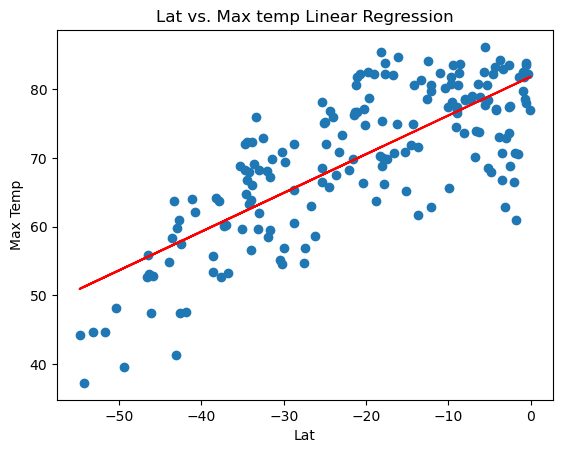

In [62]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_cities_df, 'Lat', 'Max Temp')
    

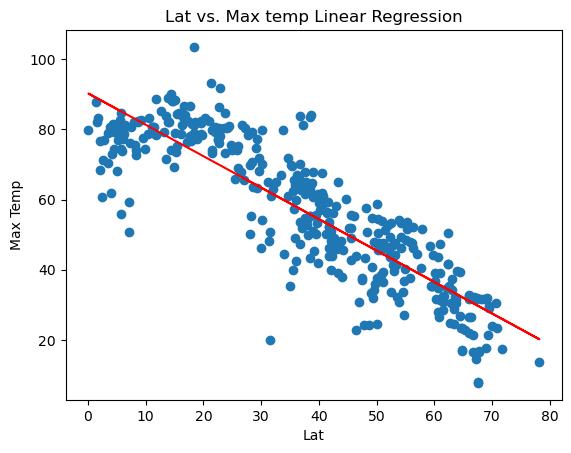

In [63]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

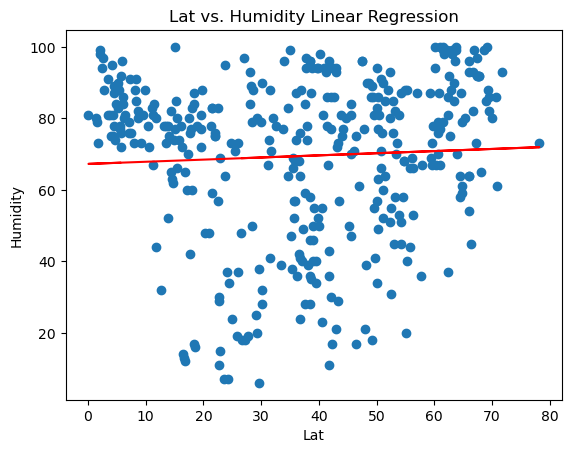

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere, 'Lat', 'Humidity')

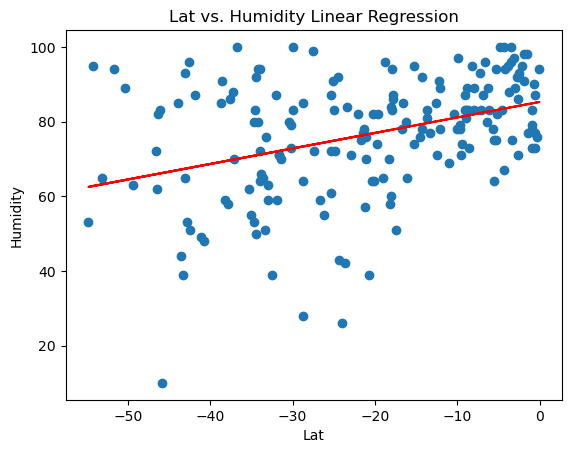

In [65]:
# Southern Hemisphere
plot_linear_regression(southern_cities_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

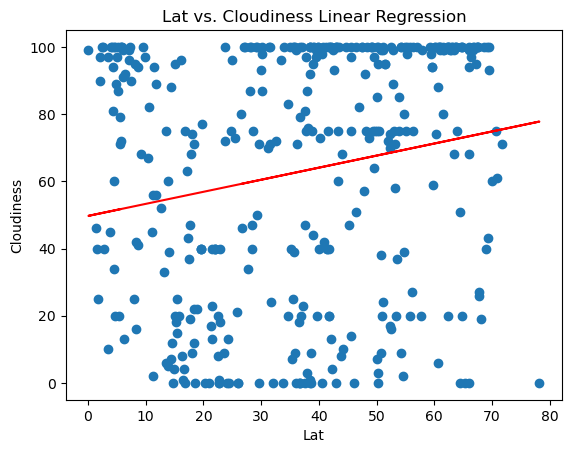

In [66]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere, 'Lat', 'Cloudiness')

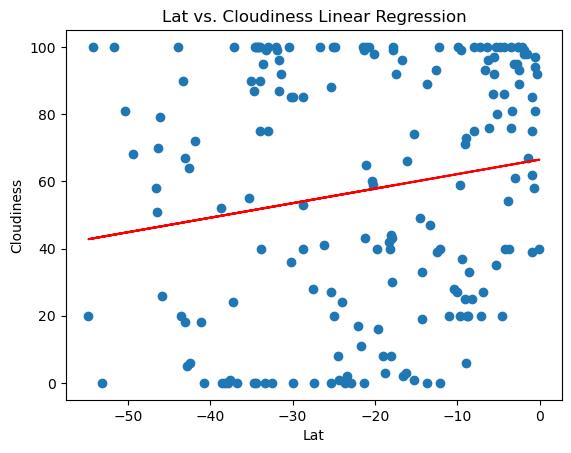

In [67]:
# Southern Hemisphere
plot_linear_regression(southern_cities_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

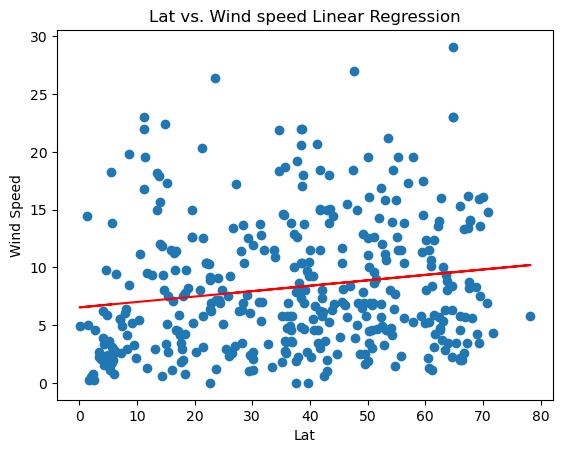

In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere, 'Lat', 'Wind Speed')

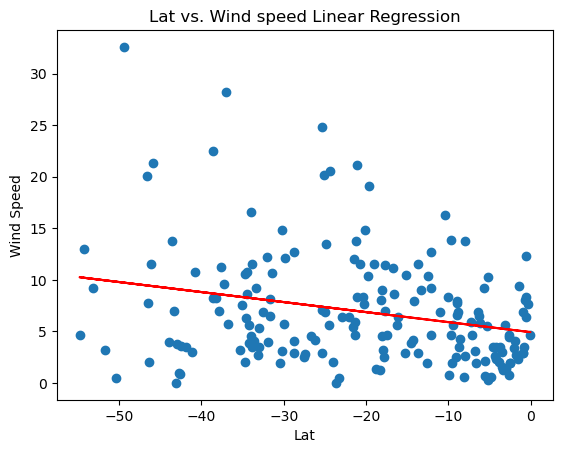

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_cities_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Lat Vs Wind graph appears to show the South with a negative slope while the northern appears to have a positive one